# Wikimedia Public Resources for Research

In this notebook you will find a set of **working examples** to connect Wikimedia Research Resources, to jupyter notebooks, importing the data to Pandas Dataframes. The list of resources covered are:

* Quarry (https://quarry.wmflabs.org)
* Pages Views (https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews)
* Event Stream (https://wikitech.wikimedia.org/wiki/EventStreams)
* Wikimedia API (https://www.mediawiki.org/wiki/API:Main_page)
* ORES (https://www.mediawiki.org/wiki/API:Main_page)

# Quarry + Pandas


### Load quarry

* parse_dates = [0] tells pandas to parse data from column 0
* index_col = 0, tells pandas to set column 0 as index (makes easy to plot, among other things)
* To modify the topic, check this query https://quarry.wmflabs.org/query/22898 and modify page_tile field, run the query and click on Download file and right click on csv and select Copy Link



In [2]:
%matplotlib inline
import pandas as pd

brazil = pd.read_csv('https://quarry.wmflabs.org/run/215651/output/0/csv?download=true',parse_dates=[0],index_col=0)
biology = pd.read_csv('https://quarry.wmflabs.org/run/215652/output/0/csv?download=true',parse_dates=[0],index_col=0)



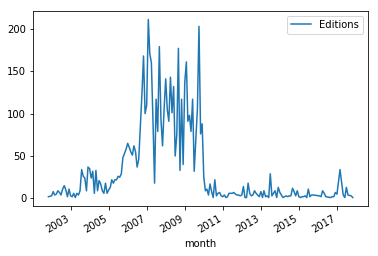

In [2]:
biology.plot()

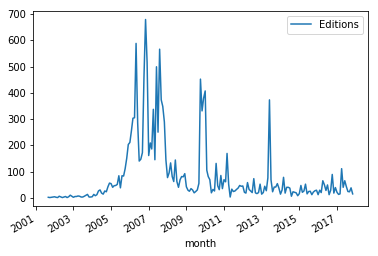

In [3]:
brazil.plot()

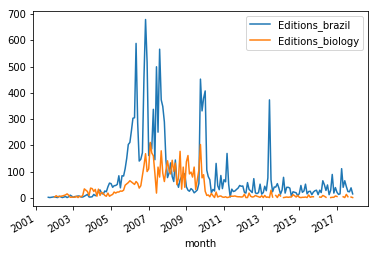

In [4]:
data = brazil.join(biology, lsuffix='_brazil', rsuffix='_biology')
data.plot()

# Page Views

In [5]:
df = pd.read_json("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Pompeu_Fabra_University/daily/2018020100/2018020300",orient='records')

In [1]:
import urllib 
import json
import pandas as pd

def getViews(page,start,end,project):
    base_url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/%s/all-access/all-agents/%s/daily/%s/%s" % (project,page,start,end)
    data = urllib.request.urlopen(base_url)
    dataJson = json.loads(data.read().decode('utf-8'))['items']
    df = pd.DataFrame(dataJson) [['views','timestamp']]
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H')
    return df

In [12]:
df = getViews('Universitat_Pompeu_Fabra','2018010100','2018020300','ca.wikipedia')

In [13]:
df

,views,timestamp
0,9,2018-01-01
1,11,2018-01-02
2,17,2018-01-03
3,9,2018-01-04
4,28,2018-01-05
5,9,2018-01-06
6,10,2018-01-07
7,13,2018-01-08
8,14,2018-01-09
9,17,2018-01-10


# Event Stream
Example of event stream, for details look here: https://wikitech.wikimedia.org/wiki/EventStreams

In [1]:
import json
from sseclient import SSEClient as EventSource

url = 'https://stream.wikimedia.org/v2/stream/recentchange'
wiki = 'enwiki' #Client side filter
counter = 0 
maxEvents = 10 # print n events and stop
for event in EventSource(url):
    if event.event == 'message':
        try:
            change = json.loads(event.data)
        except ValueError:
            continue
        if change['wiki'] == wiki:
            print('{user} edited {title}'.format(**change))
            counter += 1
            if counter > maxEvents:
                break
            

Debian117 edited Qtum
Ronhjones edited File:BYU-Hawaii sub logo.png
NessieVL edited Category:Stereaceae
NessieVL edited Category:Russulales
Karaol edited Pervolia
Saramarissa edited User:Saramarissa/be bold
2605:E000:1300:433A:BD21:DF40:A22B:292D edited Kevin Weisman
Hammersoft edited Confey College
Stormy clouds edited User talk:CanadiaNinja
Debian117 edited Category:Pages with citations using unnamed parameters
Ammarof edited 2018 Syrian Cup


# Wikimedia API

## with urllib

In [16]:
import requests
import json

def getUserInfo(users):
    base_url = "https://www.mediawiki.org/w/api.php?action=query&list=users&ususers=%s&usprop=groups|editcount|gender|registration&format=json" % '|'.join(users)
    response = requests.get(base_url)
    data = json.loads(response.text)
    return data['query']

getUserInfo(['DarTar','Diego (WMF)'])

{'users': [{'editcount': 1033,
   'gender': 'unknown',
   'groups': ['autopatrolled', '*', 'user', 'autoconfirmed'],
   'name': 'DarTar',
   'registration': '2009-02-18T13:03:38Z',
   'userid': 112036},
  {'editcount': 2,
   'gender': 'unknown',
   'groups': ['*', 'user', 'autoconfirmed'],
   'name': 'Diego (WMF)',
   'registration': '2017-08-04T22:07:06Z',
   'userid': 10833688}]}

## with mwapi

In [65]:
import mwapi

session = mwapi.Session("https://en.wikipedia.org", user_agent="diego@wikimedia.org -- Tools demo")
result = session.get(action='query', prop='revisions', titles="Pompeu_Fabra_University", rvprop=['ids', 'timestamp','user'],
           rvlimit=100, rvdir="newer", formatversion=2, continuation=True)
list(result)

[{'continue': {'continue': '||', 'rvcontinue': '20071222235421|179689682'},
  'query': {'normalized': [{'from': 'Pompeu_Fabra_University',
     'fromencoded': False,
     'to': 'Pompeu Fabra University'}],
   'pages': [{'ns': 0,
     'pageid': 63872,
     'revisions': [{'parentid': 0,
       'revid': 2035848,
       'timestamp': '2002-07-24T03:19:39Z',
       'user': 'Perique des Palottes'},
      {'parentid': 2035848,
       'revid': 2035856,
       'timestamp': '2003-12-24T10:16:56Z',
       'user': 'Jmabel'},
      {'parentid': 2035856,
       'revid': 2036188,
       'timestamp': '2003-12-24T10:18:40Z',
       'user': 'Jmabel'},
      {'parentid': 2036188,
       'revid': 4052780,
       'timestamp': '2003-12-24T10:30:55Z',
       'user': 'Jmabel'},
      {'parentid': 4052780,
       'revid': 15957622,
       'timestamp': '2004-06-12T15:20:48Z',
       'user': 'Llull'},
      {'parentid': 15957622,
       'revid': 26623979,
       'timestamp': '2005-10-27T15:05:31Z',
       'user':

# ORES Example

In [17]:
%matplotlib notebook
import csv
import json
import time
import sys

import requests
import mwapi
import mwtypes
import pandas
import seaborn

session = mwapi.Session("https://en.wikipedia.org", user_agent="diego@wikimedia.org -- Tools demo")

WEIGHTS = {'Stub': 1, 'Start': 2, 'C': 3, 'B': 4, 'GA': 5, 'FA': 6}
def score2sum(score_doc):
    weighted_sum = 0
    for cl, proba in score_doc['probability'].items():
        weighted_sum += WEIGHTS[cl] * proba
    return weighted_sum

def fetch_wp10_score(rev_id):
    response = requests.get('https://ores.wikimedia.org/v3/scores/enwiki/{0}/wp10'.format(rev_id))
    return response.json()['enwiki']['scores'][str(rev_id)]['wp10']['score']

def fetch_historical_scores(page_name):
    historical_scores = []
    for response_doc in session.get(action='query', prop='revisions', titles=page_name, 
                                    rvprop=['ids', 'timestamp'], rvlimit=100, rvdir="newer", 
                                    formatversion=2, continuation=True):
        for rev_doc in response_doc['query']['pages'][0]['revisions']:
            rev_id = rev_doc['revid']
            timestamp = rev_doc['timestamp']
            weighted_sum = score2sum(fetch_wp10_score(rev_id))
            historical_scores.append({'rev_id': rev_id, 'timestamp': timestamp, 'weighted_sum': weighted_sum})
            sys.stderr.write(".")
            sys.stderr.flush()
        sys.stderr.write("\n")
    
    return historical_scores

In [20]:
historical_scores = pandas.DataFrame(fetch_historical_scores("Pompeu Fabra University"))                                                                           
historical_scores['time'] =pandas.to_datetime(historical_scores.timestamp, format='%Y-%m-%dT%H:%M:%SZ',errors='ignore')
historical_scores = historical_scores.set_index('time')


....................................................................................................
....................................................................................................
....................................................................................................
........................................................................................


<IPython.core.display.Javascript object>


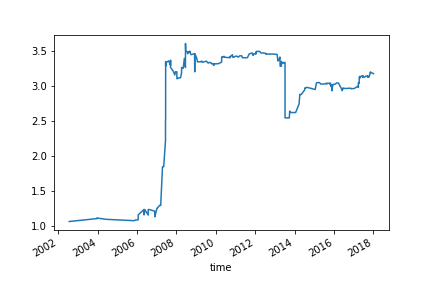

In [21]:
historical_scores['weighted_sum'].plot()